In [2]:
 ! pip install -q kaggle
 from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tomek1911","key":"64f6a3a26a4f85e4e5158da146d72508"}'}

In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
! kaggle datasets download jerzydziewierz/bee-vs-wasp --unzip


100% 557M/559M [00:05<00:00, 90.0MB/s]
100% 559M/559M [00:05<00:00, 108MB/s] 


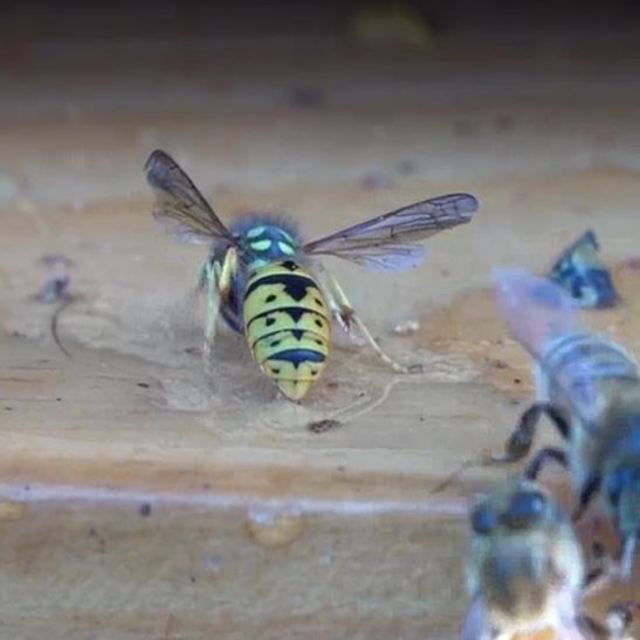

In [29]:
import PIL
import PIL.Image
PIL.Image.open("/content/kaggle_bee_vs_wasp/wasp2/I00191.jpg")

In [7]:
pip install fastai --upgrade

     |████████████████████████████████| 194kB 9.3MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision.all import *
from fastai.metrics import error_rate

# additional classic imports
from pathlib import Path
import pandas as pd
import numpy as np
import random

In [9]:
bs = 64 # Batch size
resize_size = 96 # for training, resize all the images to a square of this size
training_subsample = 0.05 # for development, use a small fraction of the entire dataset

In [10]:
bees_vs_wasps_dataset_path=Path("/content/kaggle_bee_vs_wasp") # this is relative to the "example_notebook" folder. Modify this to reflect your setup
df_labels = pd.read_csv(bees_vs_wasps_dataset_path/'labels.csv')
df_labels=df_labels.set_index('id')

In [11]:
df_labels = df_labels.sample(frac=training_subsample, axis=0)

In [12]:
df_labels.size

5139

In [13]:
df_labels.head(10)


,path,is_bee,is_wasp,is_otherinsect,is_other,photo_quality,is_validation,is_final_validation,label
id,,,,,,,,,
3168,bee2\P7621-95r.jpg,1,0,0,0,0,1,0,bee
7613,wasp2\J00377.jpg,0,1,0,0,0,0,0,wasp
3117,bee2\P59724-170r.jpg,1,0,0,0,0,0,0,bee
3241,wasp1\1243074631_39f7c64f75_m.jpg,0,1,0,0,1,0,0,wasp
769,bee1\2870789067_a9cbf3a2e4_n.jpg,1,0,0,0,1,0,0,bee
6463,wasp2\H00116.jpg,0,1,0,0,0,0,0,wasp
2576,bee2\NP2082-26r.jpg,1,0,0,0,0,0,0,bee
8956,other_insect\29457745698_c48946b3cd_n.jpg,0,0,1,0,1,0,0,insect
965,bee1\3316272081_affa0723db_m.jpg,1,0,0,0,1,0,0,bee


In [30]:
df_labels[['path']] = df_labels[['path']].replace(to_replace= r'\\', value= r'/', regex=True)

In [31]:
df_labels.head(10)

,path,is_bee,is_wasp,is_otherinsect,is_other,photo_quality,is_validation,is_final_validation,label
id,,,,,,,,,
3168,bee2/P7621-95r.jpg,1,0,0,0,0,1,0,bee
7613,wasp2/J00377.jpg,0,1,0,0,0,0,0,wasp
3117,bee2/P59724-170r.jpg,1,0,0,0,0,0,0,bee
3241,wasp1/1243074631_39f7c64f75_m.jpg,0,1,0,0,1,0,0,wasp
769,bee1/2870789067_a9cbf3a2e4_n.jpg,1,0,0,0,1,0,0,bee
6463,wasp2/H00116.jpg,0,1,0,0,0,0,0,wasp
2576,bee2/NP2082-26r.jpg,1,0,0,0,0,0,0,bee
8956,other_insect/29457745698_c48946b3cd_n.jpg,0,0,1,0,1,0,0,insect
965,bee1/3316272081_affa0723db_m.jpg,1,0,0,0,1,0,0,bee


In [23]:
ImageDataLoaders.from_df??

In [36]:
data = ImageDataLoaders.from_df(
    df = df_labels,
    path = Path(bees_vs_wasps_dataset_path),
    valid_pct=0.2,
    seed = 42,
    fn_col='path',
    folder=None,
    label_col='label',
    bs=bs,
    shuffle_train=True,
    batch_tfms=aug_transforms(),
    item_tfms=Resize(resize_size),
    device='cuda', 
    num_workers=0
)

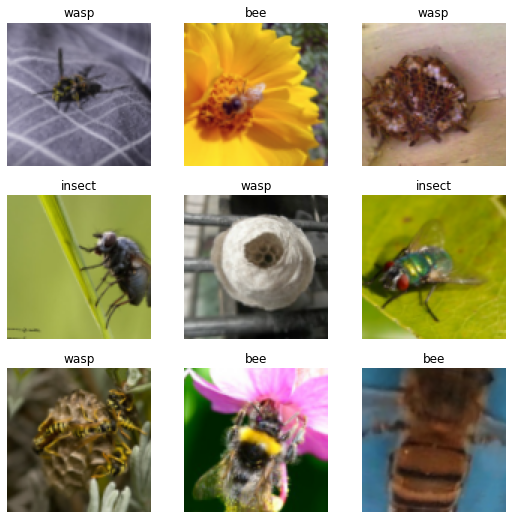

In [37]:
data.show_batch()

In [54]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy, pretrained=true)

SuggestedLRs(lr_min=0.005296459421515465, lr_steep=0.000269217329332605)


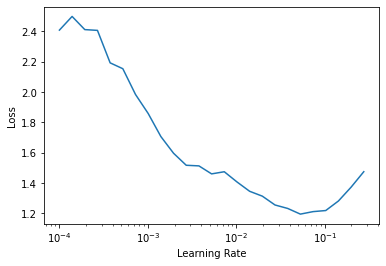

In [55]:
best_lr=learn.lr_find(start_lr=1e-04, end_lr=2, num_it=30) 
print(best_lr)

In [56]:
learn.fine_tune(15,base_lr=best_lr[0])

epoch,train_loss,valid_loss,accuracy,time
0,1.632240,2.606762,0.666667,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.764555,2.307364,0.728070,00:04
1,0.567209,2.530631,0.736842,00:04
2,0.478429,2.033668,0.771930,00:04
3,0.428080,1.085523,0.833333,00:04
4,0.364423,1.259898,0.824561,00:04
5,0.327110,1.352826,0.833333,00:04
6,0.284330,1.436355,0.824561,00:04
7,0.250159,1.437331,0.798246,00:04
8,0.226872,1.367978,0.807018,00:04
9,0.202669,1.154822,0.824561,00:04


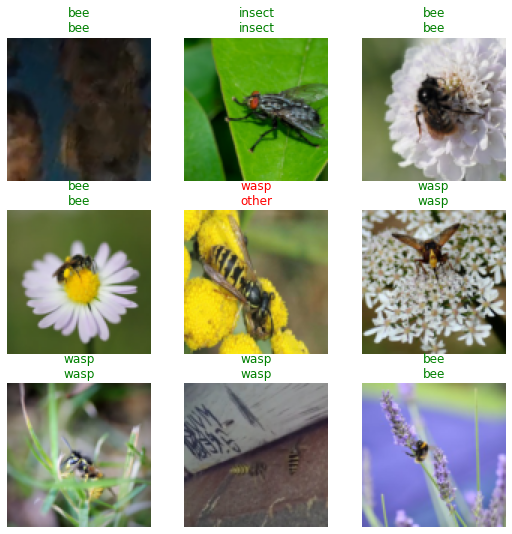

In [58]:
learn.show_results()

In [59]:
learn.save('stage-1')

Path('/content/kaggle_bee_vs_wasp/models/stage-1.pth')

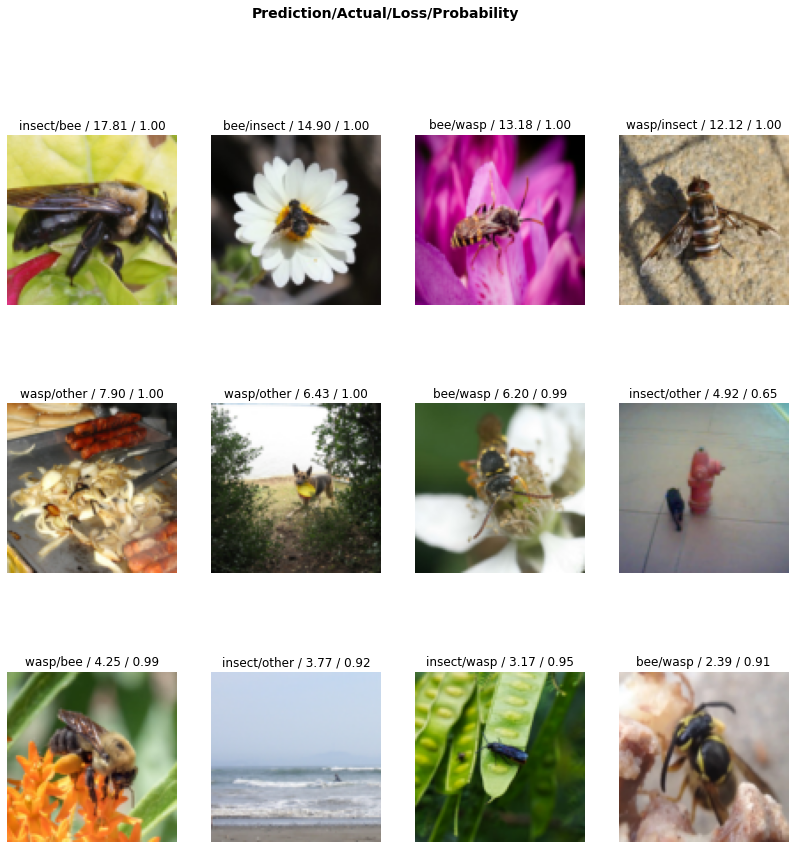

In [60]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
interp.plot_top_losses(12, figsize=(14,14))

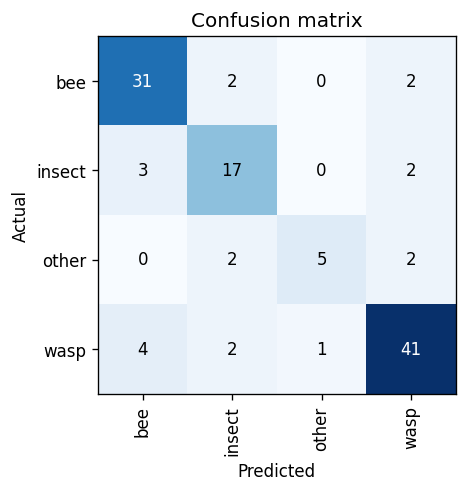

In [61]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)